<a href="https://colab.research.google.com/github/ENKI0311/UT-Austin_Coursework/blob/main/Copy_of_PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

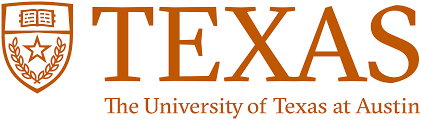

BY: John Chilton

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lab_mount/foodhub_order.csv')
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0             30.750         Weekend  Not given                     25   
1             12.080         Weekend  Not given                     25   
2             12.230         Weekday          5                     23   
3             29.200         Weekend          3                     25   
4             11.590         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations: There are 1898 rows and 9 colums in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: float64 is 1, int64 is 4, object is 4


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There is no missing data showing in the read out of isnull().sum()


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include='all').T

count unique          top  freq        mean  \
order_id              1898.000    NaN          NaN   NaN 1477495.500   
customer_id           1898.000    NaN          NaN   NaN  171168.478   
restaurant_name           1898    178  Shake Shack   219         NaN   
cuisine_type              1898     14     American   584         NaN   
cost_of_the_order     1898.000    NaN          NaN   NaN      16.499   
day_of_the_week           1898      2      Weekend  1351         NaN   
rating                    1898      4    Not given   736         NaN   
food_preparation_time 1898.000    NaN          NaN   NaN      27.372   
delivery_time         1898.000    NaN          NaN   NaN      24.162   

                             std         min         25%         50%  \
order_id                 548.050 1476547.000 1477021.250 1477495.500   
customer_id           113698.140    1311.000   77787.750  128600.000   
restaurant_name              NaN         NaN         NaN         NaN   
cuisine_type                 NaN         NaN         NaN         NaN   
cost_of_the_order          7.484       4.470      12.080      14.140   
day_of_the_week              NaN         NaN         NaN         NaN   
rating                       NaN         NaN         NaN         NaN   
food_preparation_time      4.632      20.000      23.000      27.000   
delivery_time              4.973      15.000      20.000      25.000   

                              75%         max  
order_id              1477969.750 1478444.000  
customer_id            270525.000  405334.000  
restaurant_name               NaN         NaN  
cuisine_type                  NaN         NaN  
cost_of_the_order          22.297      35.410  
day_of_the_week               NaN         NaN  
rating                        NaN         NaN  
food_preparation_time      31.000      35.000  
delivery_time              28.000      33.000

#### Observations: The minium is 20.0, The average 27.3, The maxium is 33.0


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
cat_cols = ['rating']
for column in cat_cols:
  print(df['rating'].value_counts())
  print("_" * 50)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
__________________________________________________


#### Observations: Number of orders not rated: 736.

---




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

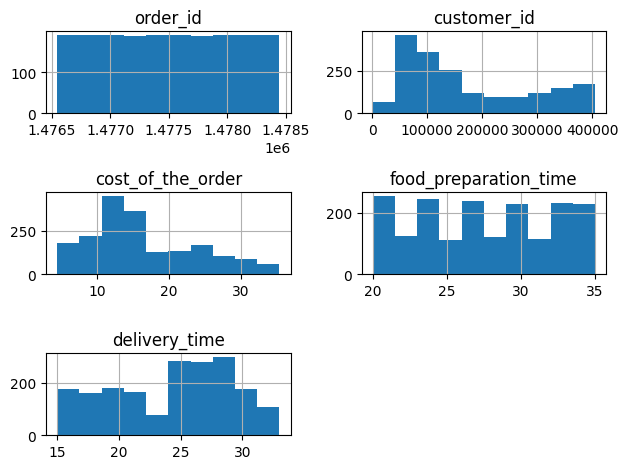

In [ ]:
# 0. Example: Histogram of the data using tight layout.
df.hist()
plt.tight_layout();

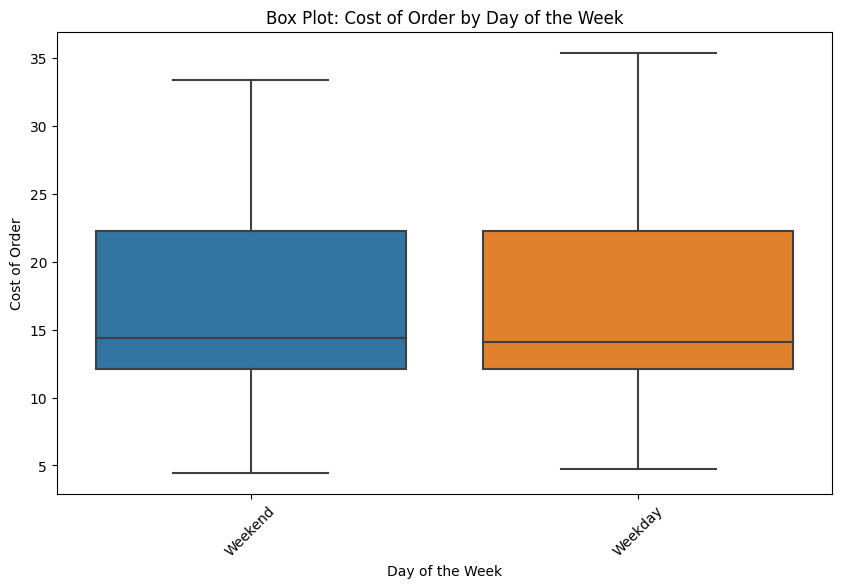

In [ ]:
# 1. Example: Boxplot of Day of the Weekday vs. Weekend.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')
plt.title('Box Plot: Cost of Order by Day of the Week')
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Cost of Order')
plt.show();

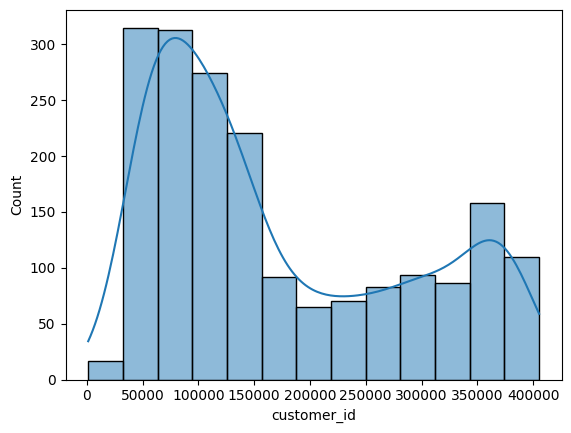

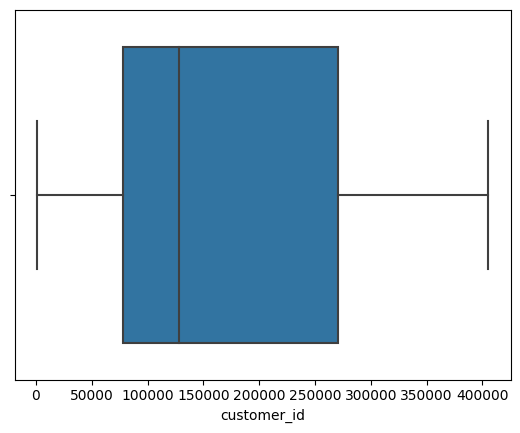

In [ ]:
# 2. Example: histplot with of Customer Id with Boxplot.
sns.histplot(data=df, x='customer_id', kde=True)
plt.show()
sns.boxplot(data=df, x='customer_id')
plt.show();

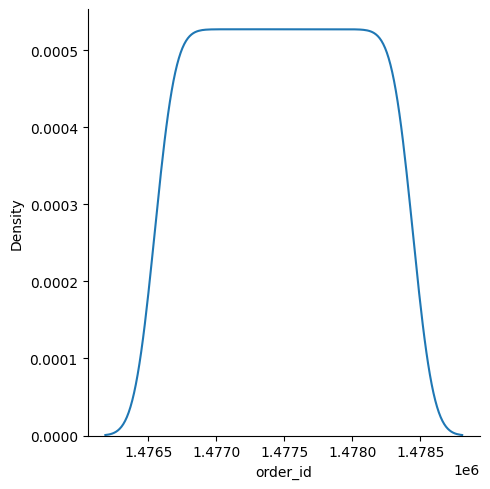

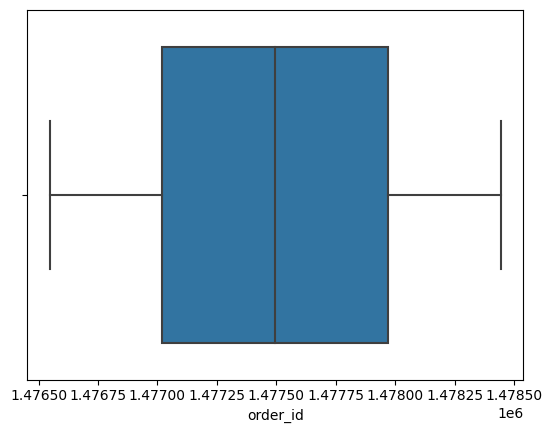

In [ ]:
# 3. Eample: Oder Id displot and boxplot.
sns.displot(data=df, x='order_id', kind='kde')
plt.show()
sns.boxplot(data=df, x='order_id')
plt.show();

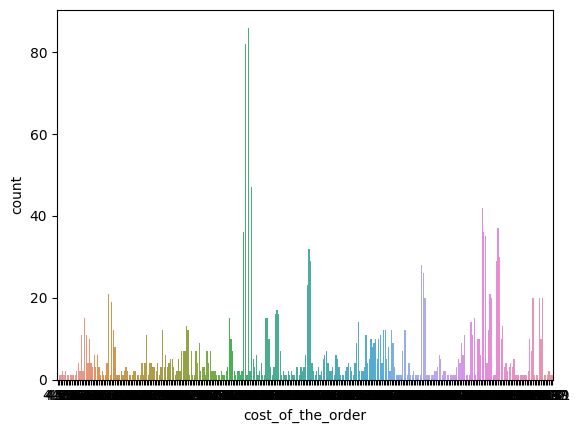

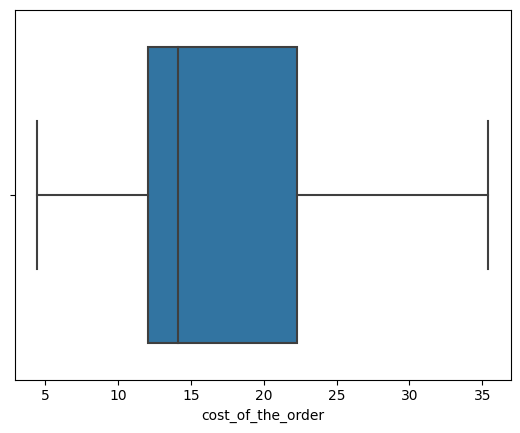

In [ ]:
# 4. Eample: Countplot and Boxplot of Cost of the order.
sns.countplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show();

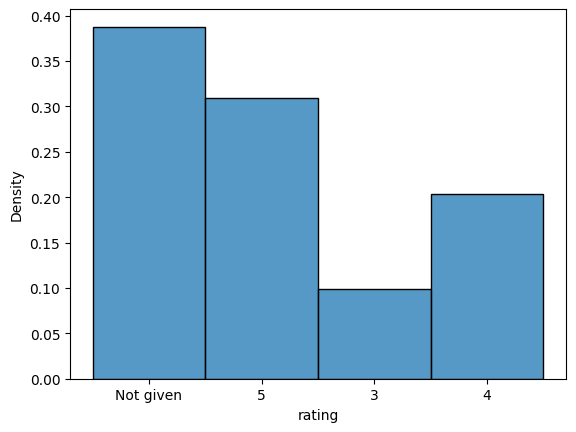

In [ ]:
# 5. Example Histplot of Rating Density.
sns.histplot(data=df, x='rating', stat='density')
plt.show();

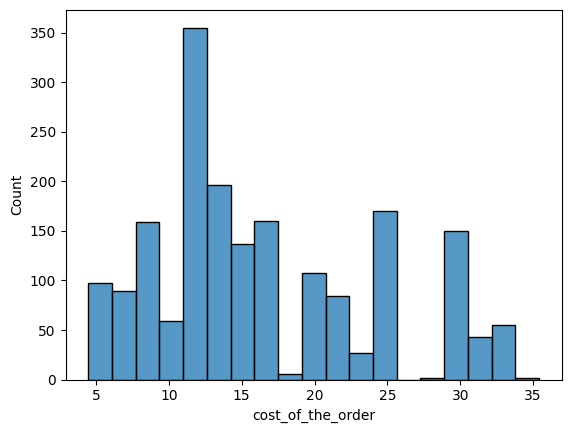

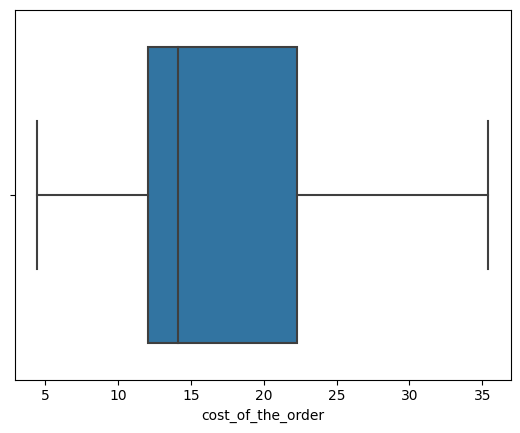

In [ ]:
# 6. Example: Histplot and Boxplot of the Cost of the Order.
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show();

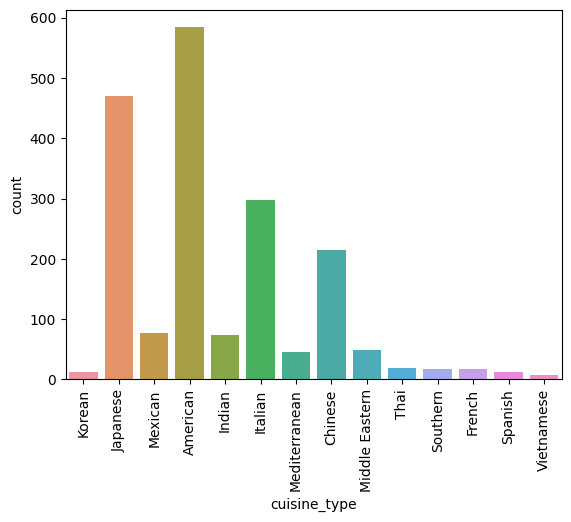

In [ ]:
# 7.Example: Countplot Cuisine Type.
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show();

In [ ]:
# 7. Example: order_id and customer_id.
unique_order_ids = len(df['order_id'].unique())
unique_customer_ids = len(df['customer_id'].unique())
print(f"Unique Order IDs: {unique_order_ids}")
print(f"Unique Customer IDs: {unique_customer_ids}")

Unique Order IDs: 1898
Unique Customer IDs: 1200


In [ ]:
# 8.Example: Rating and Customer id's.
unique_rating = len(df['rating'].unique())
unique_customer_ids = len(df['customer_id'].unique())
print(f"Unique rating: {unique_rating}")
print(f"Unique Customer IDs: {unique_customer_ids}")

Unique rating: 4
Unique Customer IDs: 1200


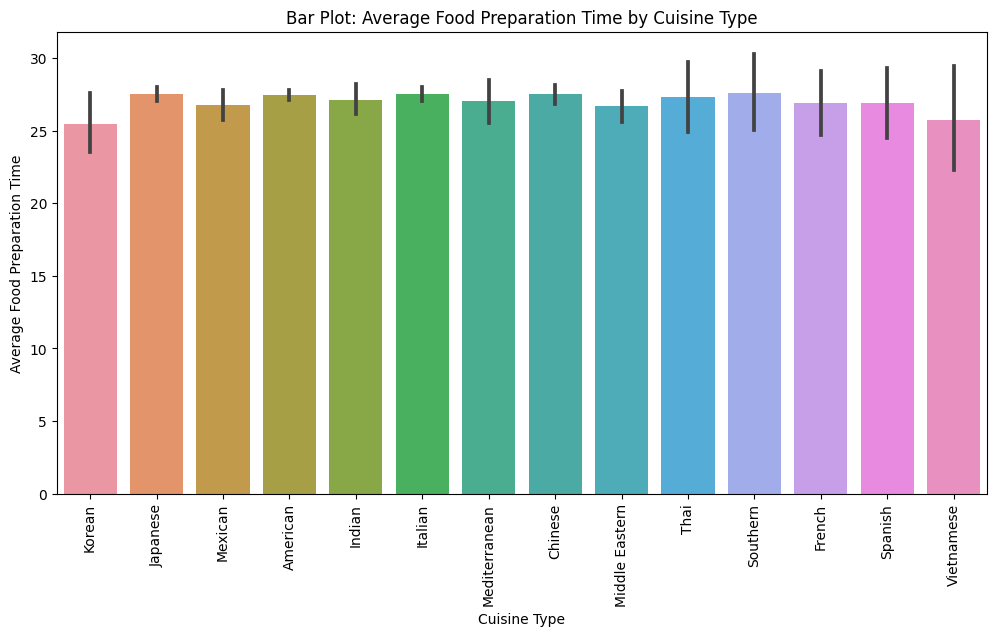

In [ ]:
# 9. Example. Bar plot of the average 'food_preparation_time' by 'cuisine_type'
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.title('Bar Plot: Average Food Preparation Time by Cuisine Type')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Average Food Preparation Time')
plt.show();

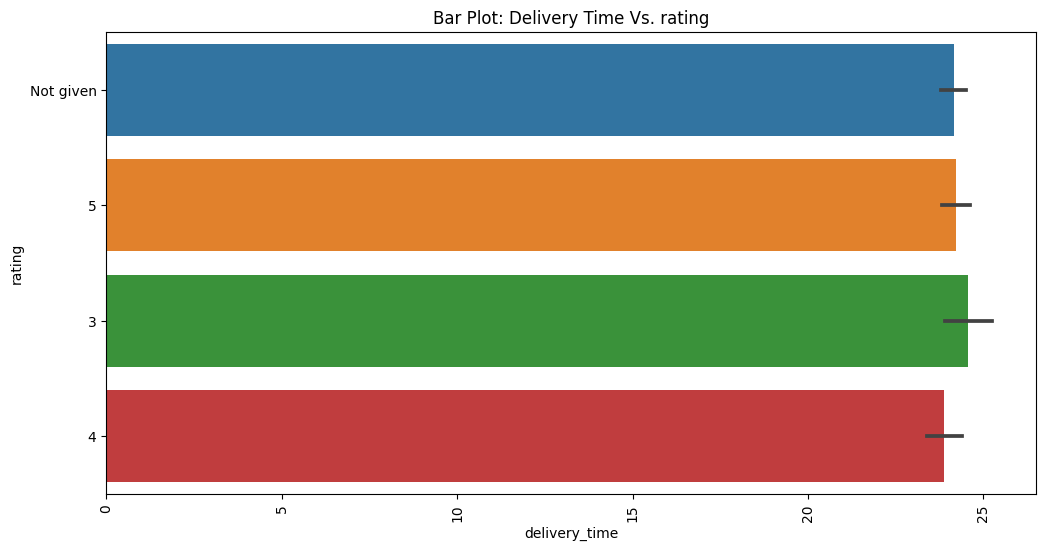

In [ ]:
# 10. Example: Barplot of Delivery Time vs. Rating.
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='delivery_time', y='rating')
plt.title('Bar Plot: Delivery Time Vs. rating')
plt.xticks(rotation=90)
plt.xlabel('delivery_time')
plt.ylabel('rating')
plt.show();

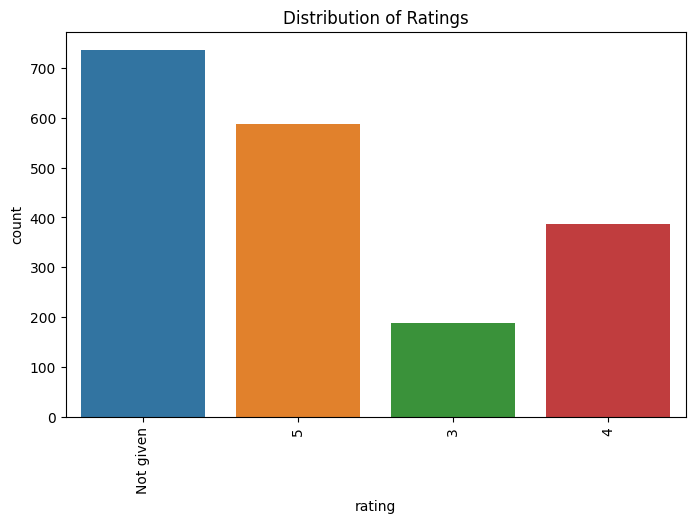

In [ ]:
# 11.Example: Countplot Ratings Distribution.
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='rating')
plt.title('Distribution of Ratings')
plt.xticks(rotation=90)
plt.show();

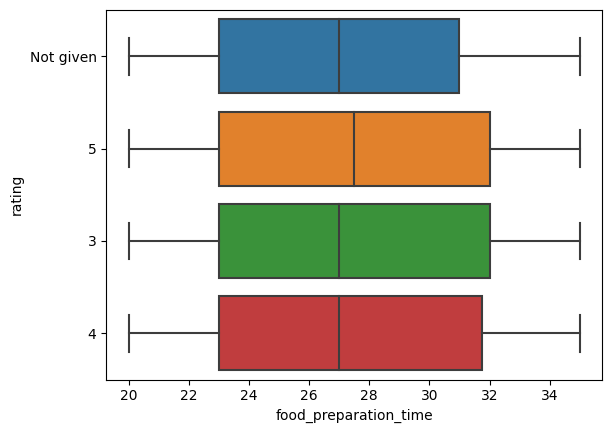

In [ ]:
# 12. Example Food Preparation Time Vs. Rating.
sns.boxplot(data=df, x='food_preparation_time', y='rating')
plt.show();

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


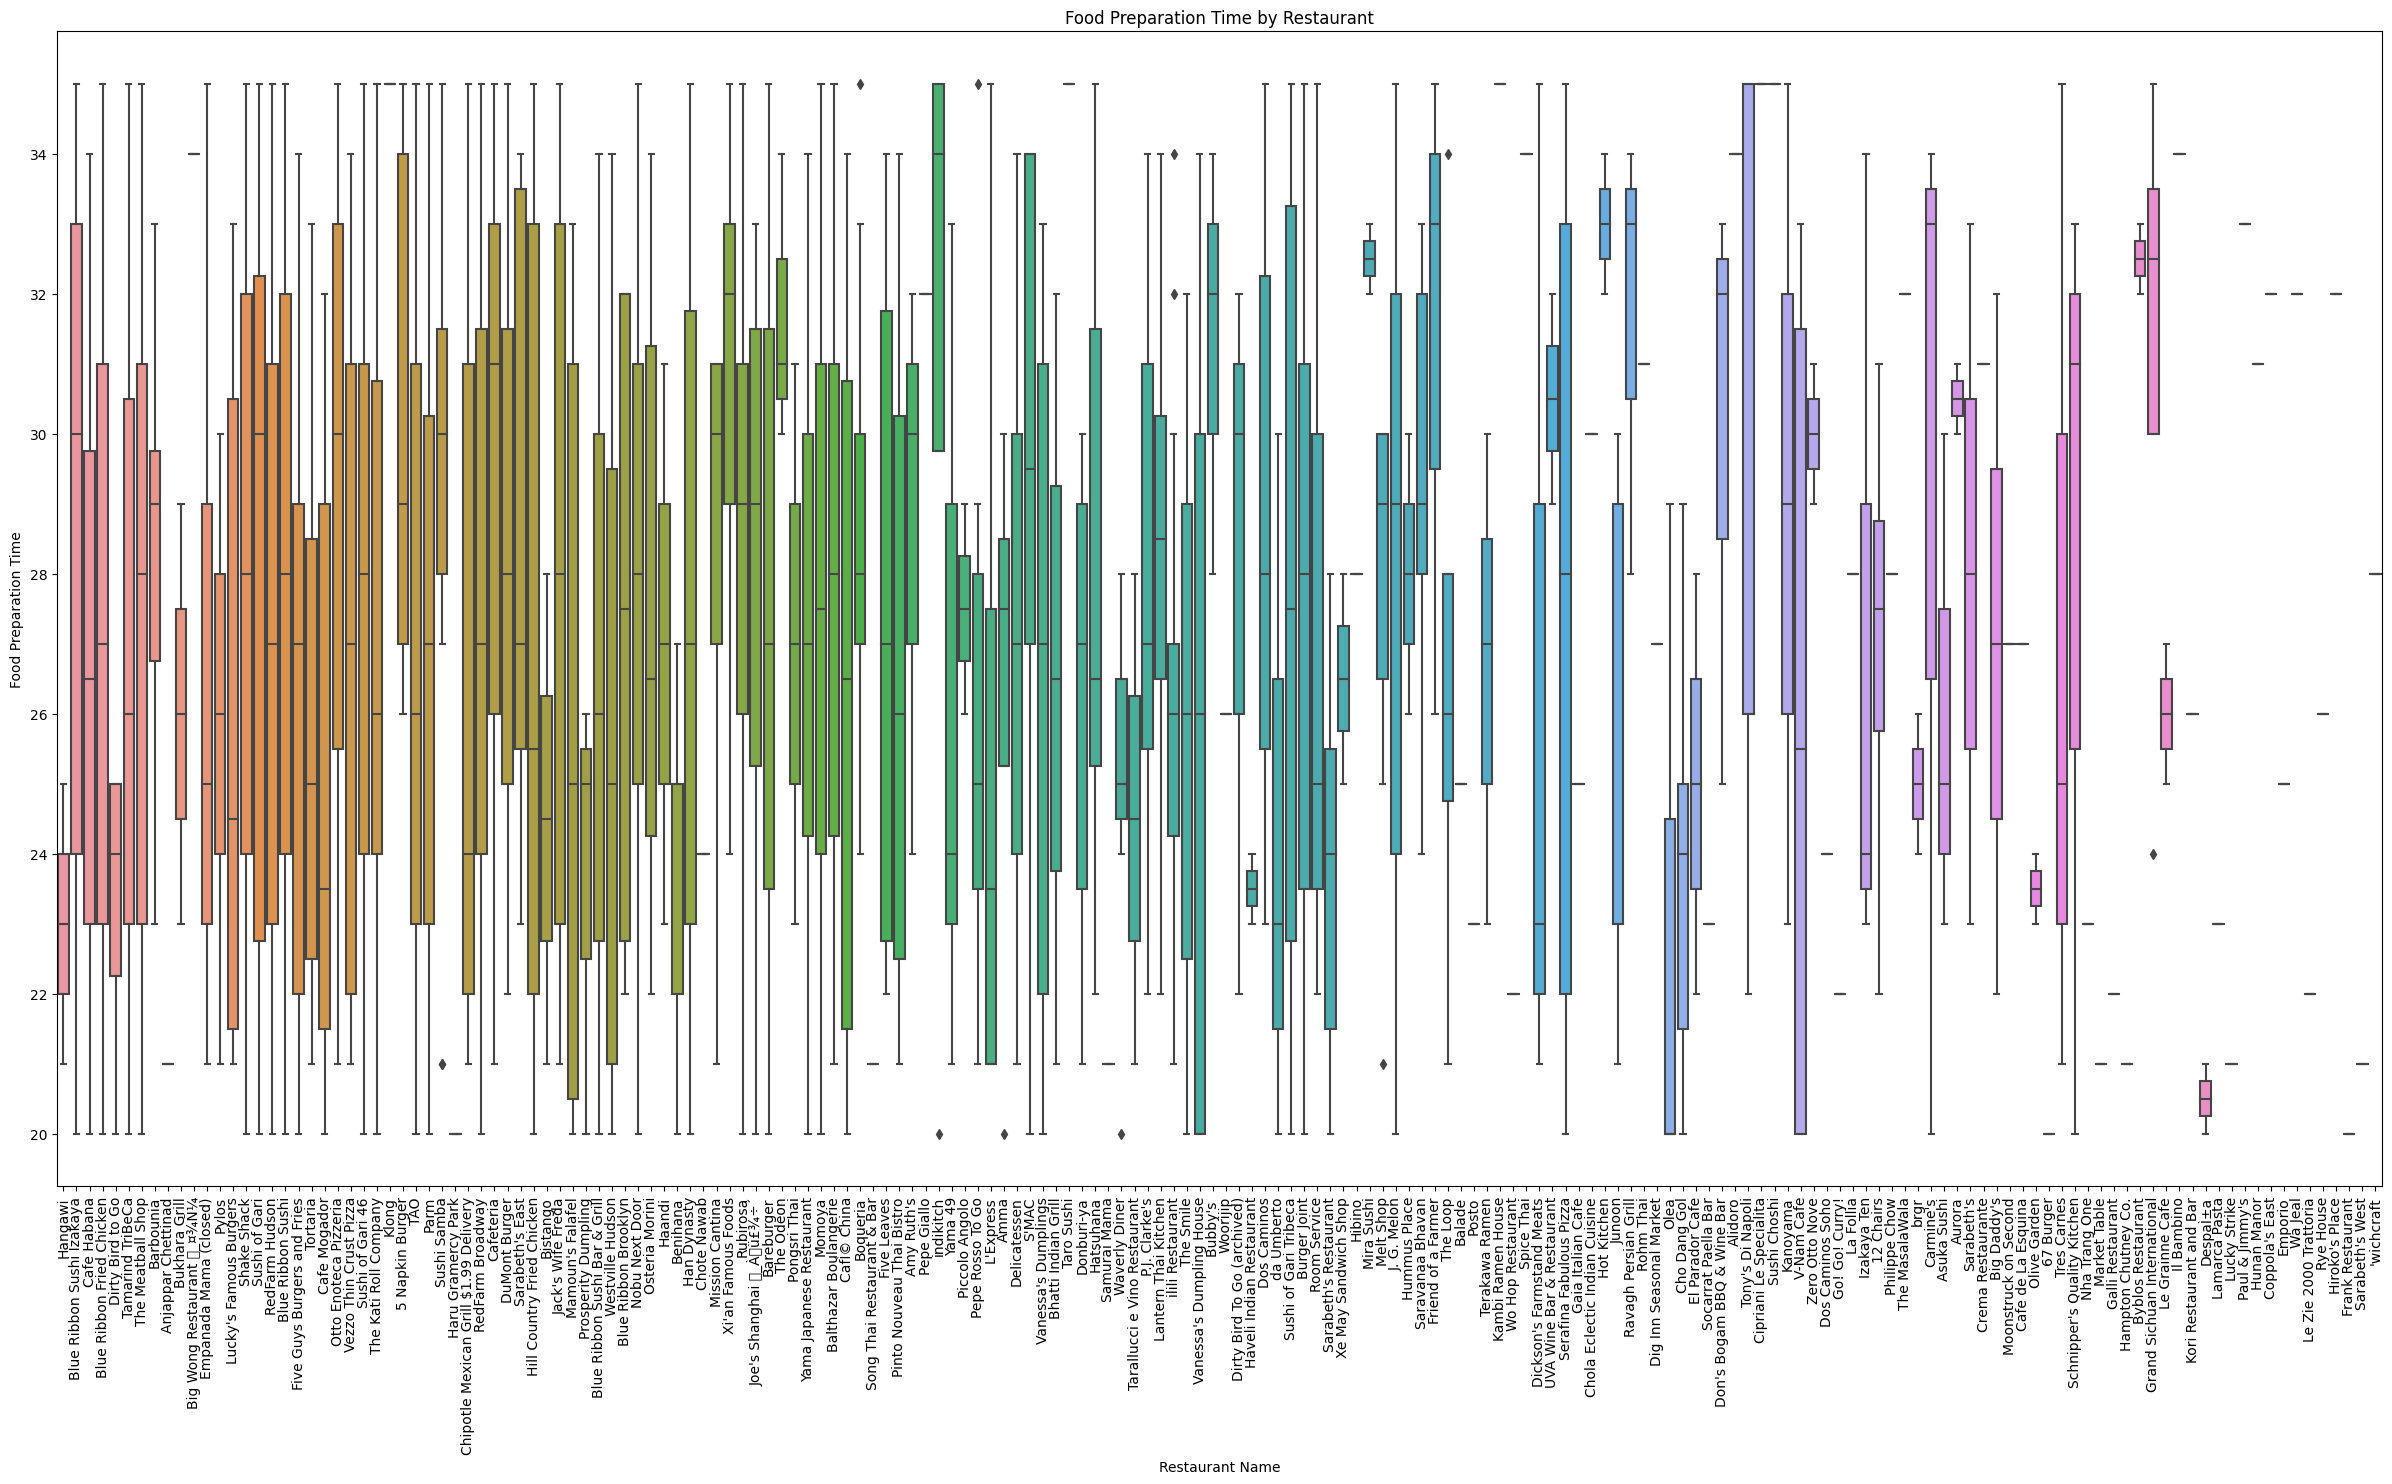

In [ ]:
# 13. Example: Boxplot of Resturant Name and Food Preparation time.
plt.figure(figsize=(30,15))
sns.boxplot(data=df, x='restaurant_name', y='food_preparation_time')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Food Preparation Time')
plt.title('Food Preparation Time by Restaurant')
plt.tight_layout
plt.show();

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Question 7. Which is the most popular cuisine on weekends?
top_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 Restaurants by Number of Orders:")
print(top_restaurants);

Top 5 Restaurants by Number of Orders:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations: Top five restaurants are: 1.Shake Shack, 2.The Meatball Shop, 3.Blue Ribbon Shushi, 4.Blue Ribbon Fried Chicken


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Question 8. Which is the most popular cuisine on weekends?
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine = weekend_orders['cuisine_type'].value_counts().idxmax()
print("The most popular cuisine on weekends is:", most_popular_cuisine);

The most popular cuisine on weekends is: American


#### Observations: American is the most Popular cuisine type on the weekend.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Question 9. What percentage of the orders cost more than 20 dollars?
percentage_above_20 = (len(df[df['cost_of_the_order'] > 20]) / len(df)) * 100
print(f"The percentage of orders costing more than $20 is: {percentage_above_20:.2f}%");

The percentage of orders costing more than $20 is: 29.24%


#### Observations:The percentage of orders costing more than $20 is: 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Question 10 What is the mean order delivery time?
mean_delivery_time = df['delivery_time'].mean()
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes");

The mean order delivery time is: 24.16 minutes


#### Observations: The mean order delivery time is: 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Question 11 The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.
top_customers = df['customer_id'].value_counts().head(3)
print("Top 3 Most Frequent Customers and Number of Orders Placed:")
print(top_customers);

Top 3 Most Frequent Customers and Number of Orders Placed:
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations: Top 3 Most Frequent Customers and Numbers Placed: 1. 52832 13 orders, 2. 47440 10 orders, 3. 83287 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# 0. Example: Column View of Cost of the order and Food Preparation Time.
df[['cost_of_the_order','food_preparation_time']]

cost_of_the_order  food_preparation_time
0                30.750                     25
1                12.080                     25
2                12.230                     23
3                29.200                     25
4                11.590                     25
...                 ...                    ...
1893             22.310                     31
1894             12.180                     31
1895             25.220                     31
1896             12.180                     23
1897             19.450                     28

[1898 rows x 2 columns]

In [ ]:
# 1. Example: Column view of Rating and Delivery Time.
df[['rating','delivery_time']]

rating  delivery_time
0     Not given             20
1     Not given             23
2             5             28
3             3             15
4             4             24
...         ...            ...
1893          5             17
1894          5             19
1895  Not given             24
1896          5             31
1897  Not given             24

[1898 rows x 2 columns]

<ipython-input-35-c851538e443a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


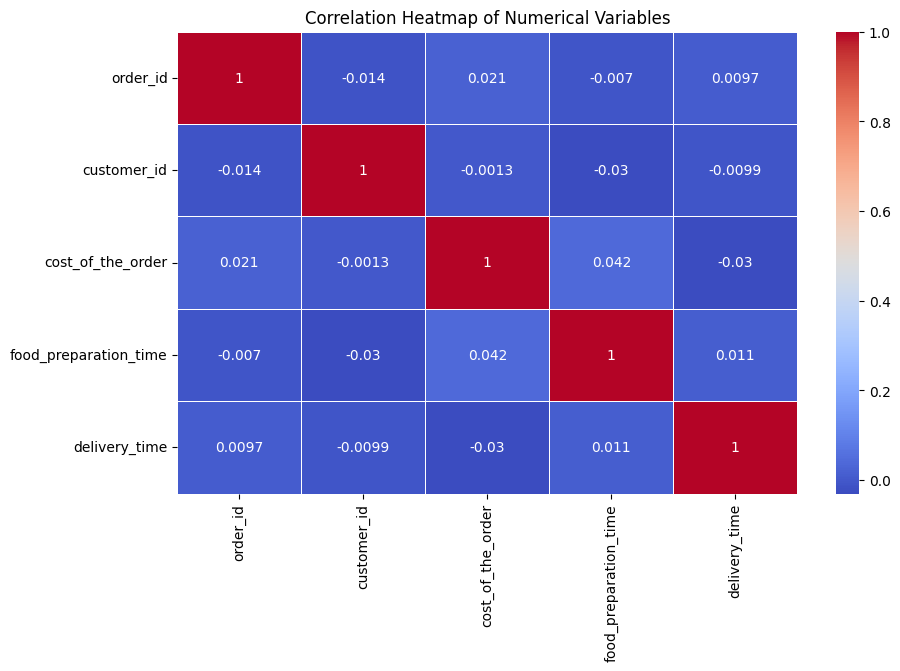

In [ ]:
# 2. Example: Heatmap of Numerical Variables.
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show();

<ipython-input-36-ee4c0e07d3e0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)


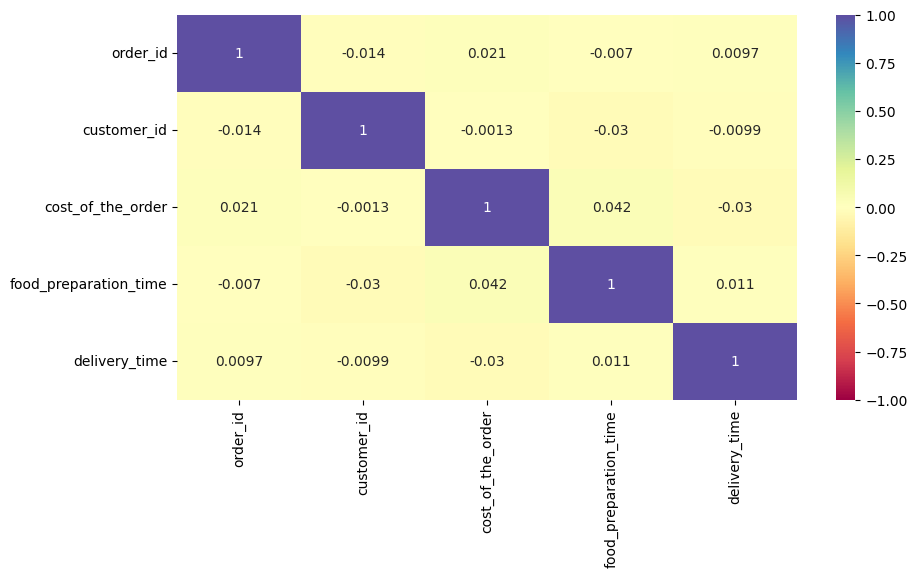

In [ ]:
# 3. Example: Heatmap of the data.
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show();

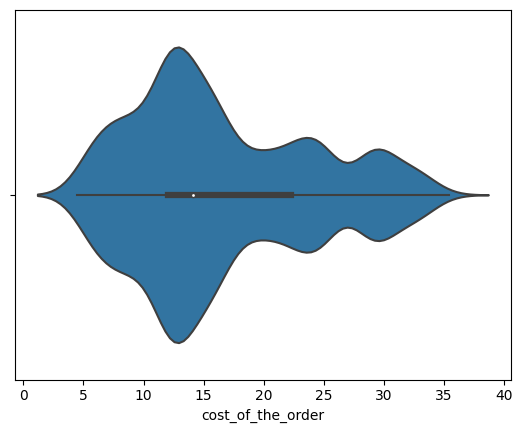

In [ ]:
# 4. Example: Violin plot for cost of the order.
sns.violinplot(data=df, x='cost_of_the_order')
plt.show();

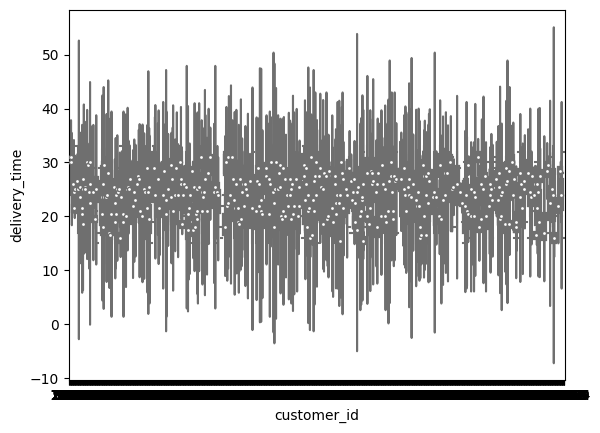

In [ ]:
# 5. Example: Violinplot of the Customer ID vs. Delivery time. Skyblue enhancement did not corlate to the data.
sns.violinplot(data=df, x='customer_id', y='delivery_time', color='skyblue')
plt.show();

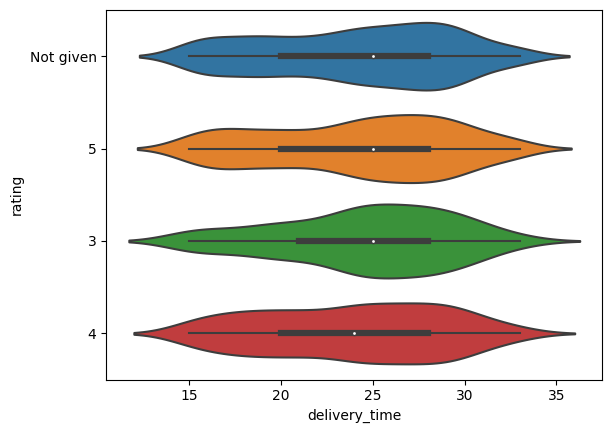

In [ ]:
# 6. Example: Violin PLot of delivery time vs. rating.
sns.violinplot(data=df, x='delivery_time', y='rating')
plt.show();

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


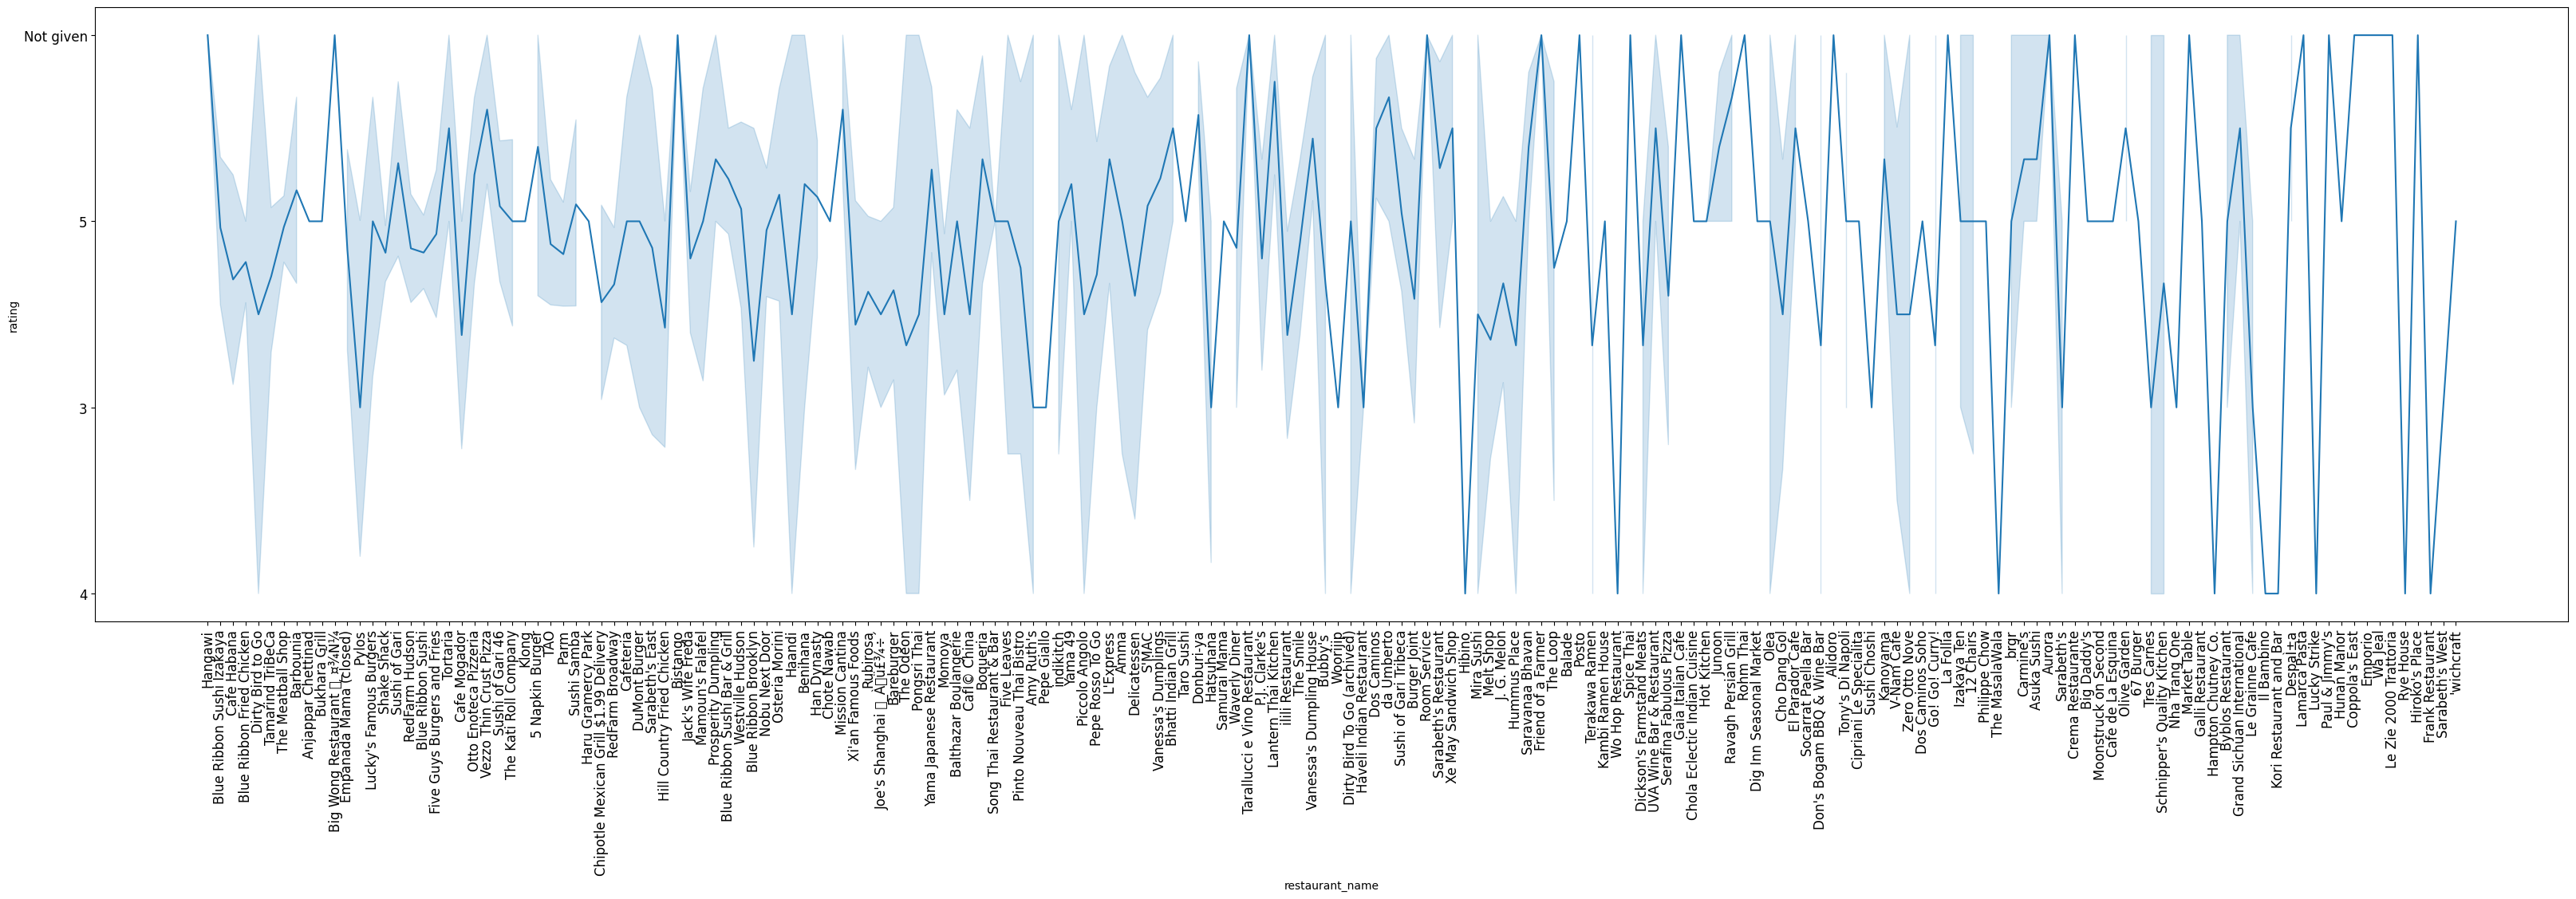

In [ ]:
# 7. Example: line PLot of restaurant name and rating.
plt.figure(figsize=(40, 10))
sns.lineplot(data=df, x='restaurant_name', y='rating')
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

<ipython-input-41-1dc5324b2fde>:11: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
<ipython-input-41-1dc5324b2fde>:11: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


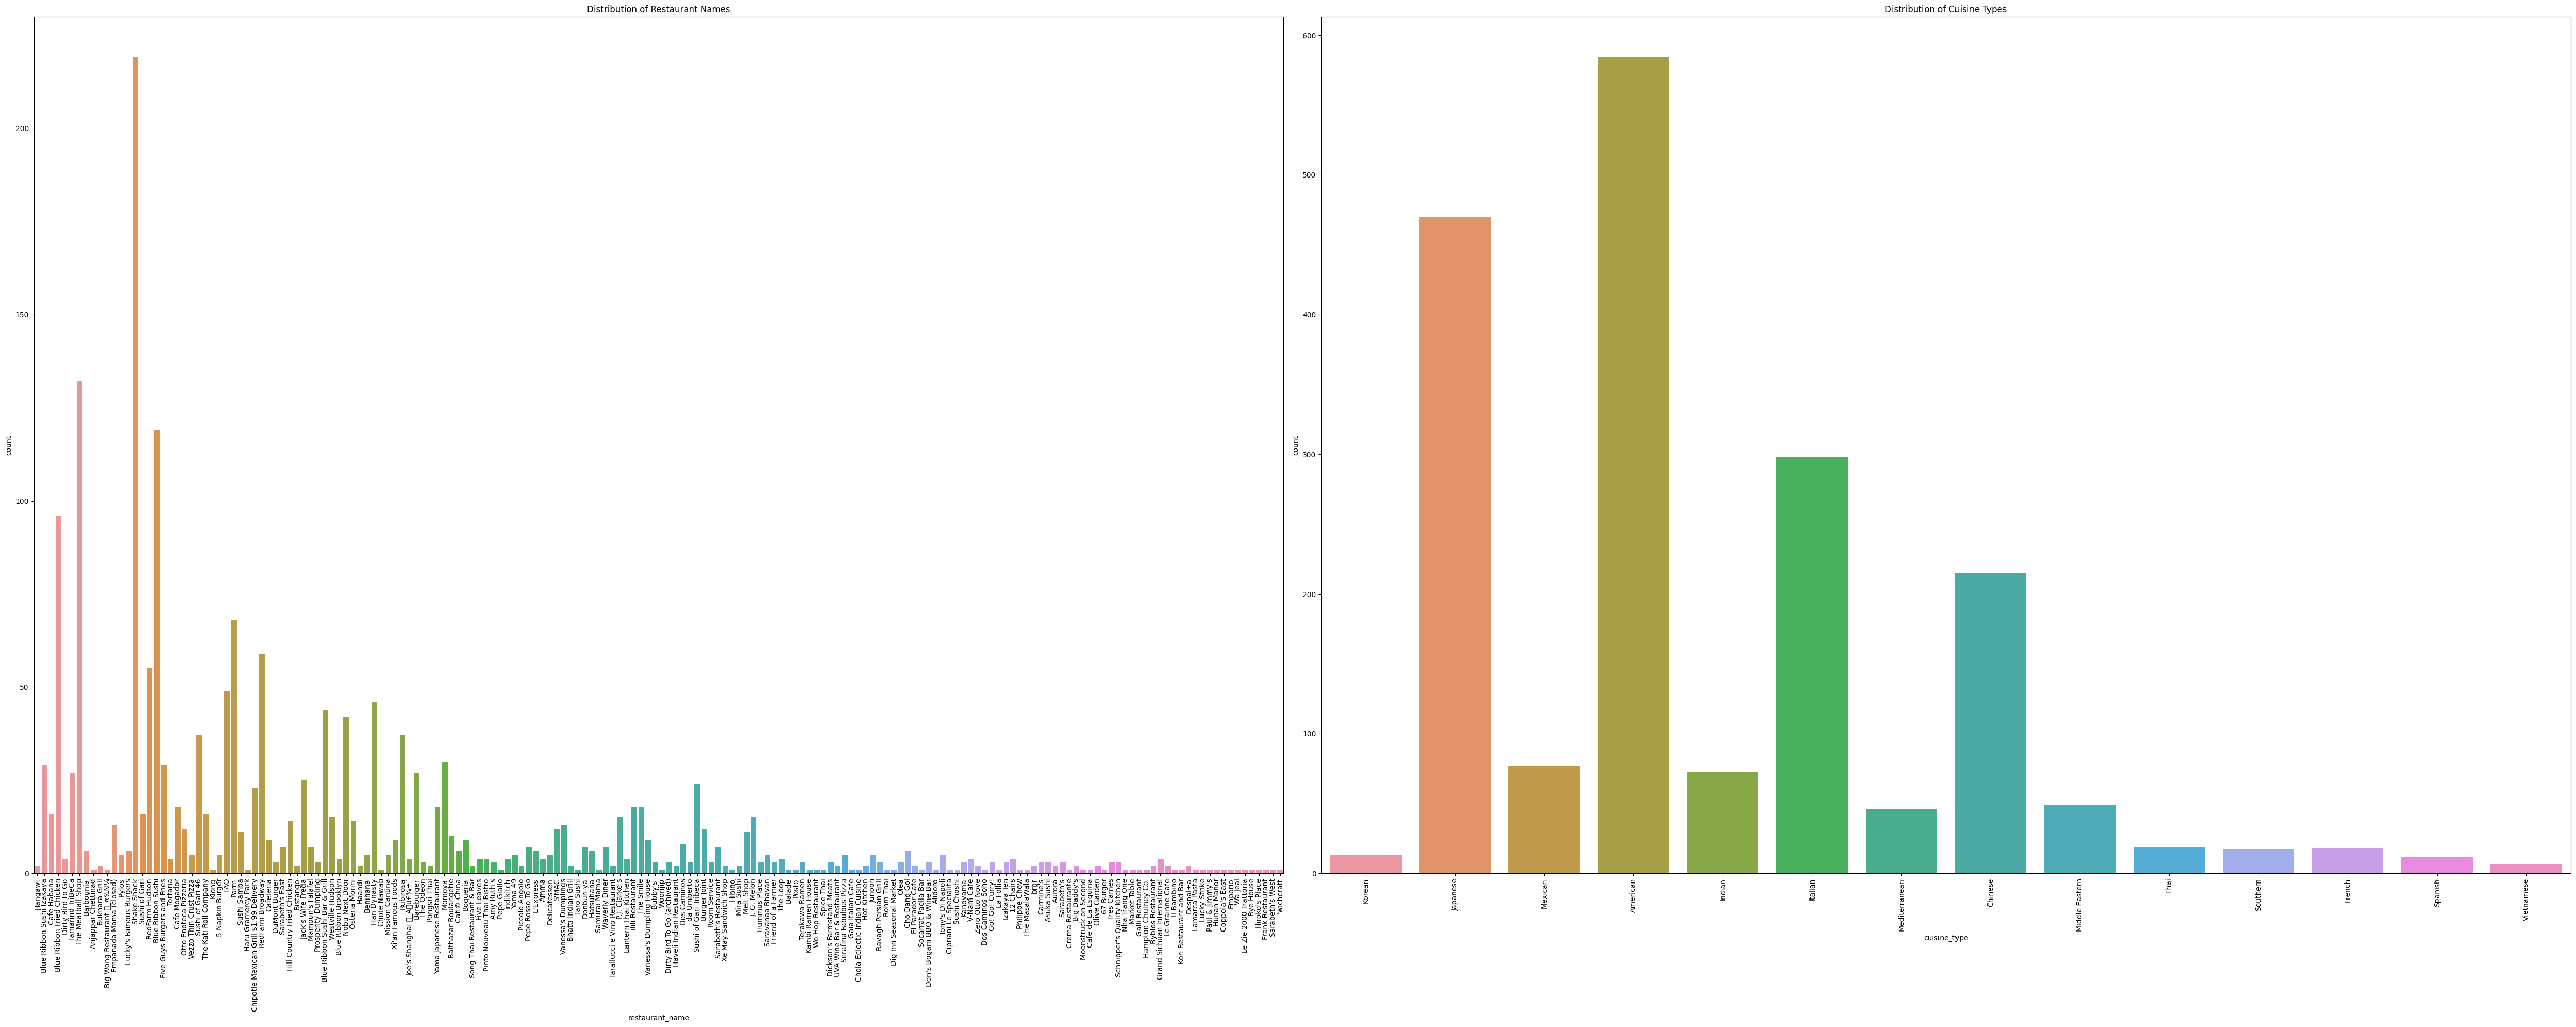

In [ ]:
# 8. Example: Countplot two Rows. Restaurant Name and Cuisine Type.
plt.figure(figsize=(50,20))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='restaurant_name')
plt.title('Distribution of Restaurant Names')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='cuisine_type')
plt.title('Distribution of Cuisine Types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

<Figure size 1000x500 with 0 Axes>

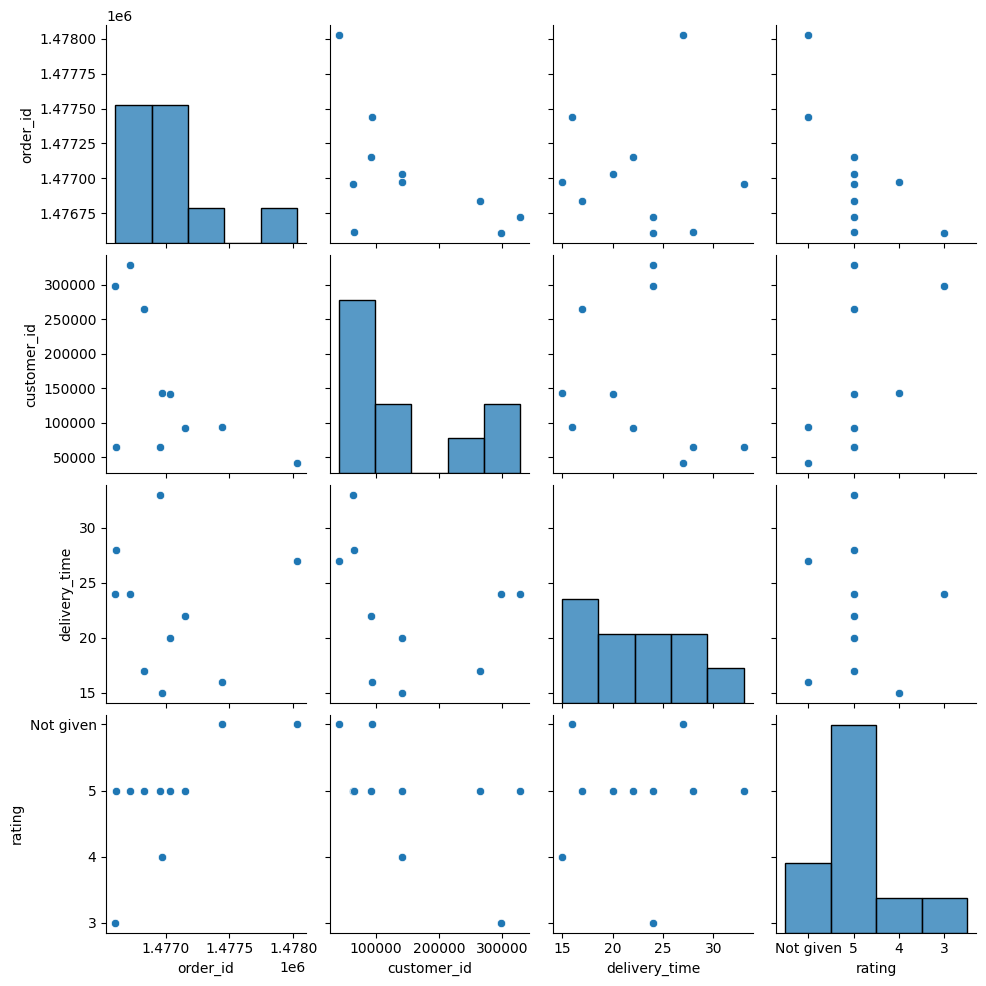

In [ ]:
# 9. Example: Pairplot for Order id, Customer id, Delivery Time, Rating.
subset_df = df.sample(n=10, random_state=5)
plt.figure(figsize=(10, 5))
sns.pairplot(data=subset_df, vars=['order_id', 'customer_id', 'delivery_time', 'rating'])
plt.show();

<Figure size 2000x1500 with 0 Axes>

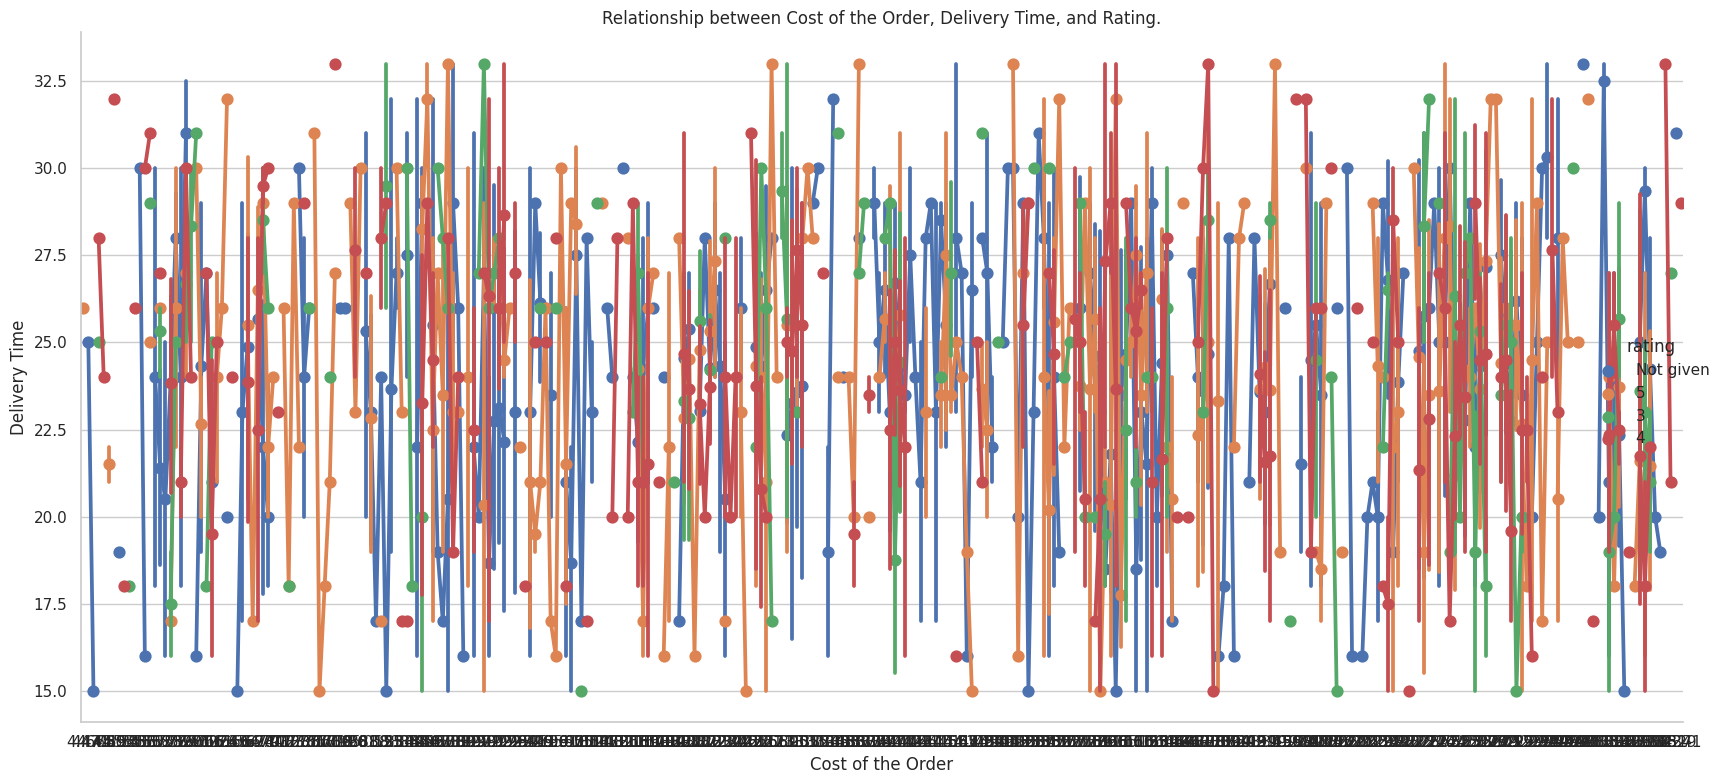

In [ ]:
# 10. Example: Catplot for Cost of the order, Delivery Time, and Rating.
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")
g = sns.catplot(data=df, x='cost_of_the_order', y='delivery_time', hue='rating', kind='point', height=8, aspect=2)
g.set_axis_labels("Cost of the Order", "Delivery Time")
plt.title("Relationship between Cost of the Order, Delivery Time, and Rating.")
plt.tight_layout()
plt.show();

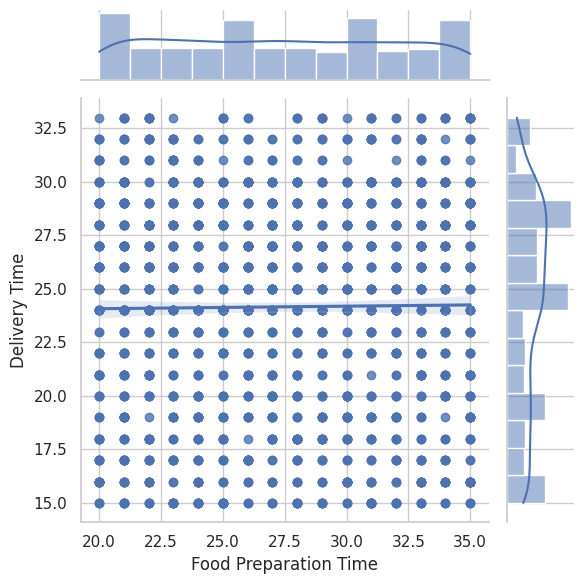

In [ ]:
# 11. Example: Jointplot for Food Preparation Time, Delivery Time. White Grid enabled.
sns.set(style="whitegrid")
sns.jointplot(data=df, x='food_preparation_time', y='delivery_time', kind="reg")
plt.xlabel("Food Preparation Time")
plt.ylabel("Delivery Time")
plt.tight_layout()
plt.show();

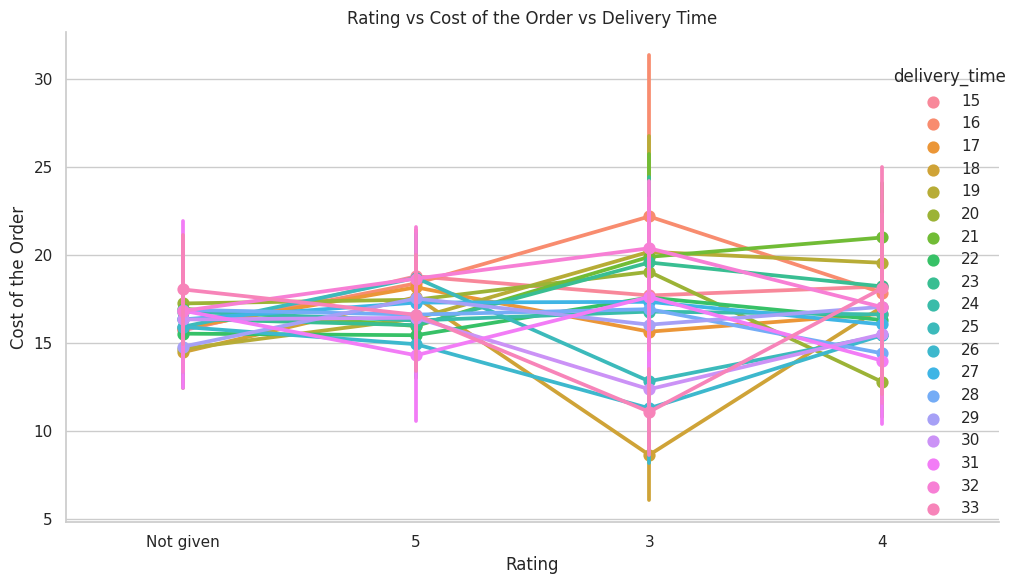

In [ ]:
# 12. Example: Rating vs Cost of the Order vs. Delivery Time.
sns.set(style="whitegrid")
g = sns.catplot(data=df, x='rating', y='cost_of_the_order', hue='delivery_time', kind='point', height=6, aspect=1.5)
g.set_axis_labels("Rating", "Cost of the Order")
plt.title("Rating vs Cost of the Order vs Delivery Time")
plt.tight_layout()
plt.show();

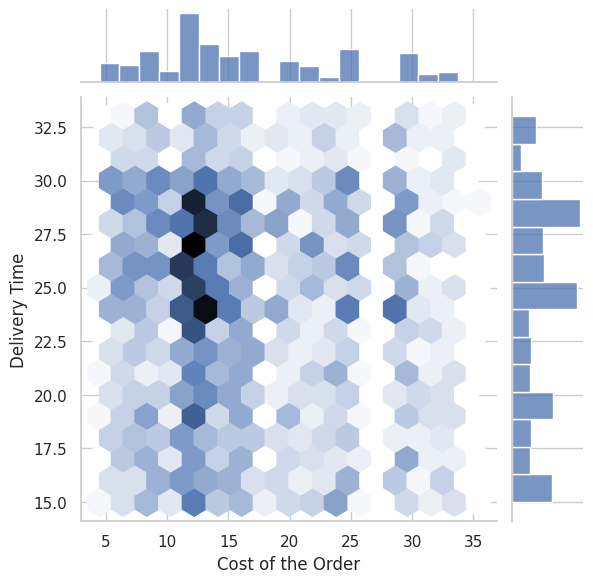

In [ ]:
# 13. Example: Jointplot for Cost of the Order vs. Delivery Time.
sns.set(style="whitegrid")
g = sns.jointplot(data=df, x='cost_of_the_order', y='delivery_time', kind="hex")
plt.colorbar
g.set_axis_labels("Cost of the Order", "Delivery Time")
plt.show();

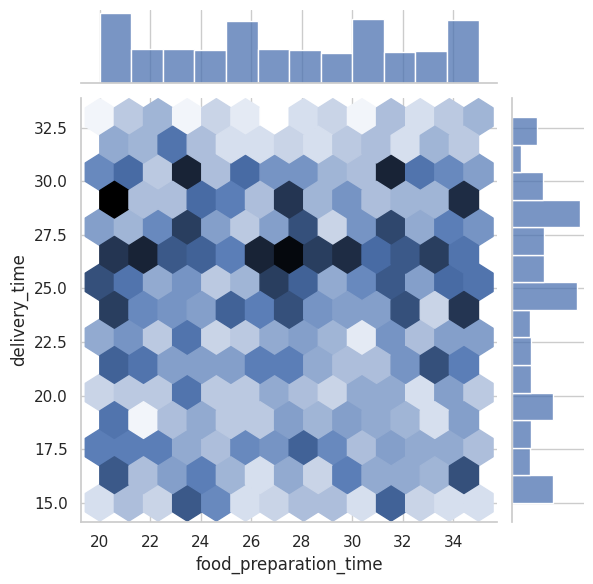

In [ ]:
# 14. Example: Hexbin plot of Food Preparation Time and Delivery Time.
sns.set(style="whitegrid")
plt.colorbar
g = sns.jointplot(data=df, x='food_preparation_time', y='delivery_time', kind="hex")
plt.show();

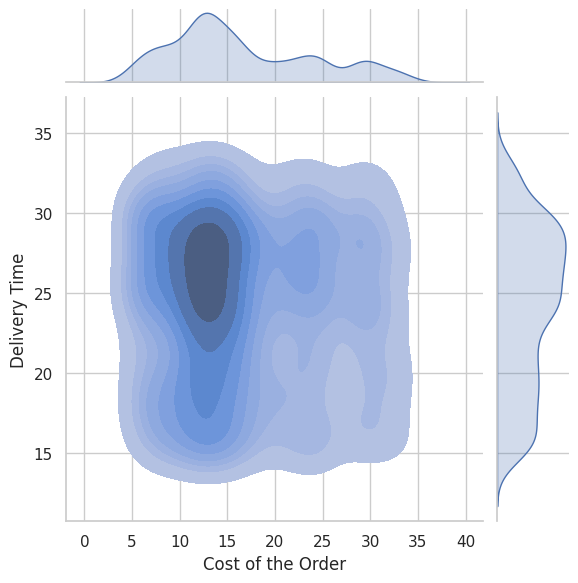

In [ ]:
# 15. Example: Jointplot for Cost of the Order and Delivery Time with Kind kde and fill True.
sns.set(style="whitegrid")
g = sns.jointplot(data=df, x='cost_of_the_order', y='delivery_time', kind="kde", fill=True)
g.set_axis_labels("Cost of the Order", "Delivery Time")

plt.show();

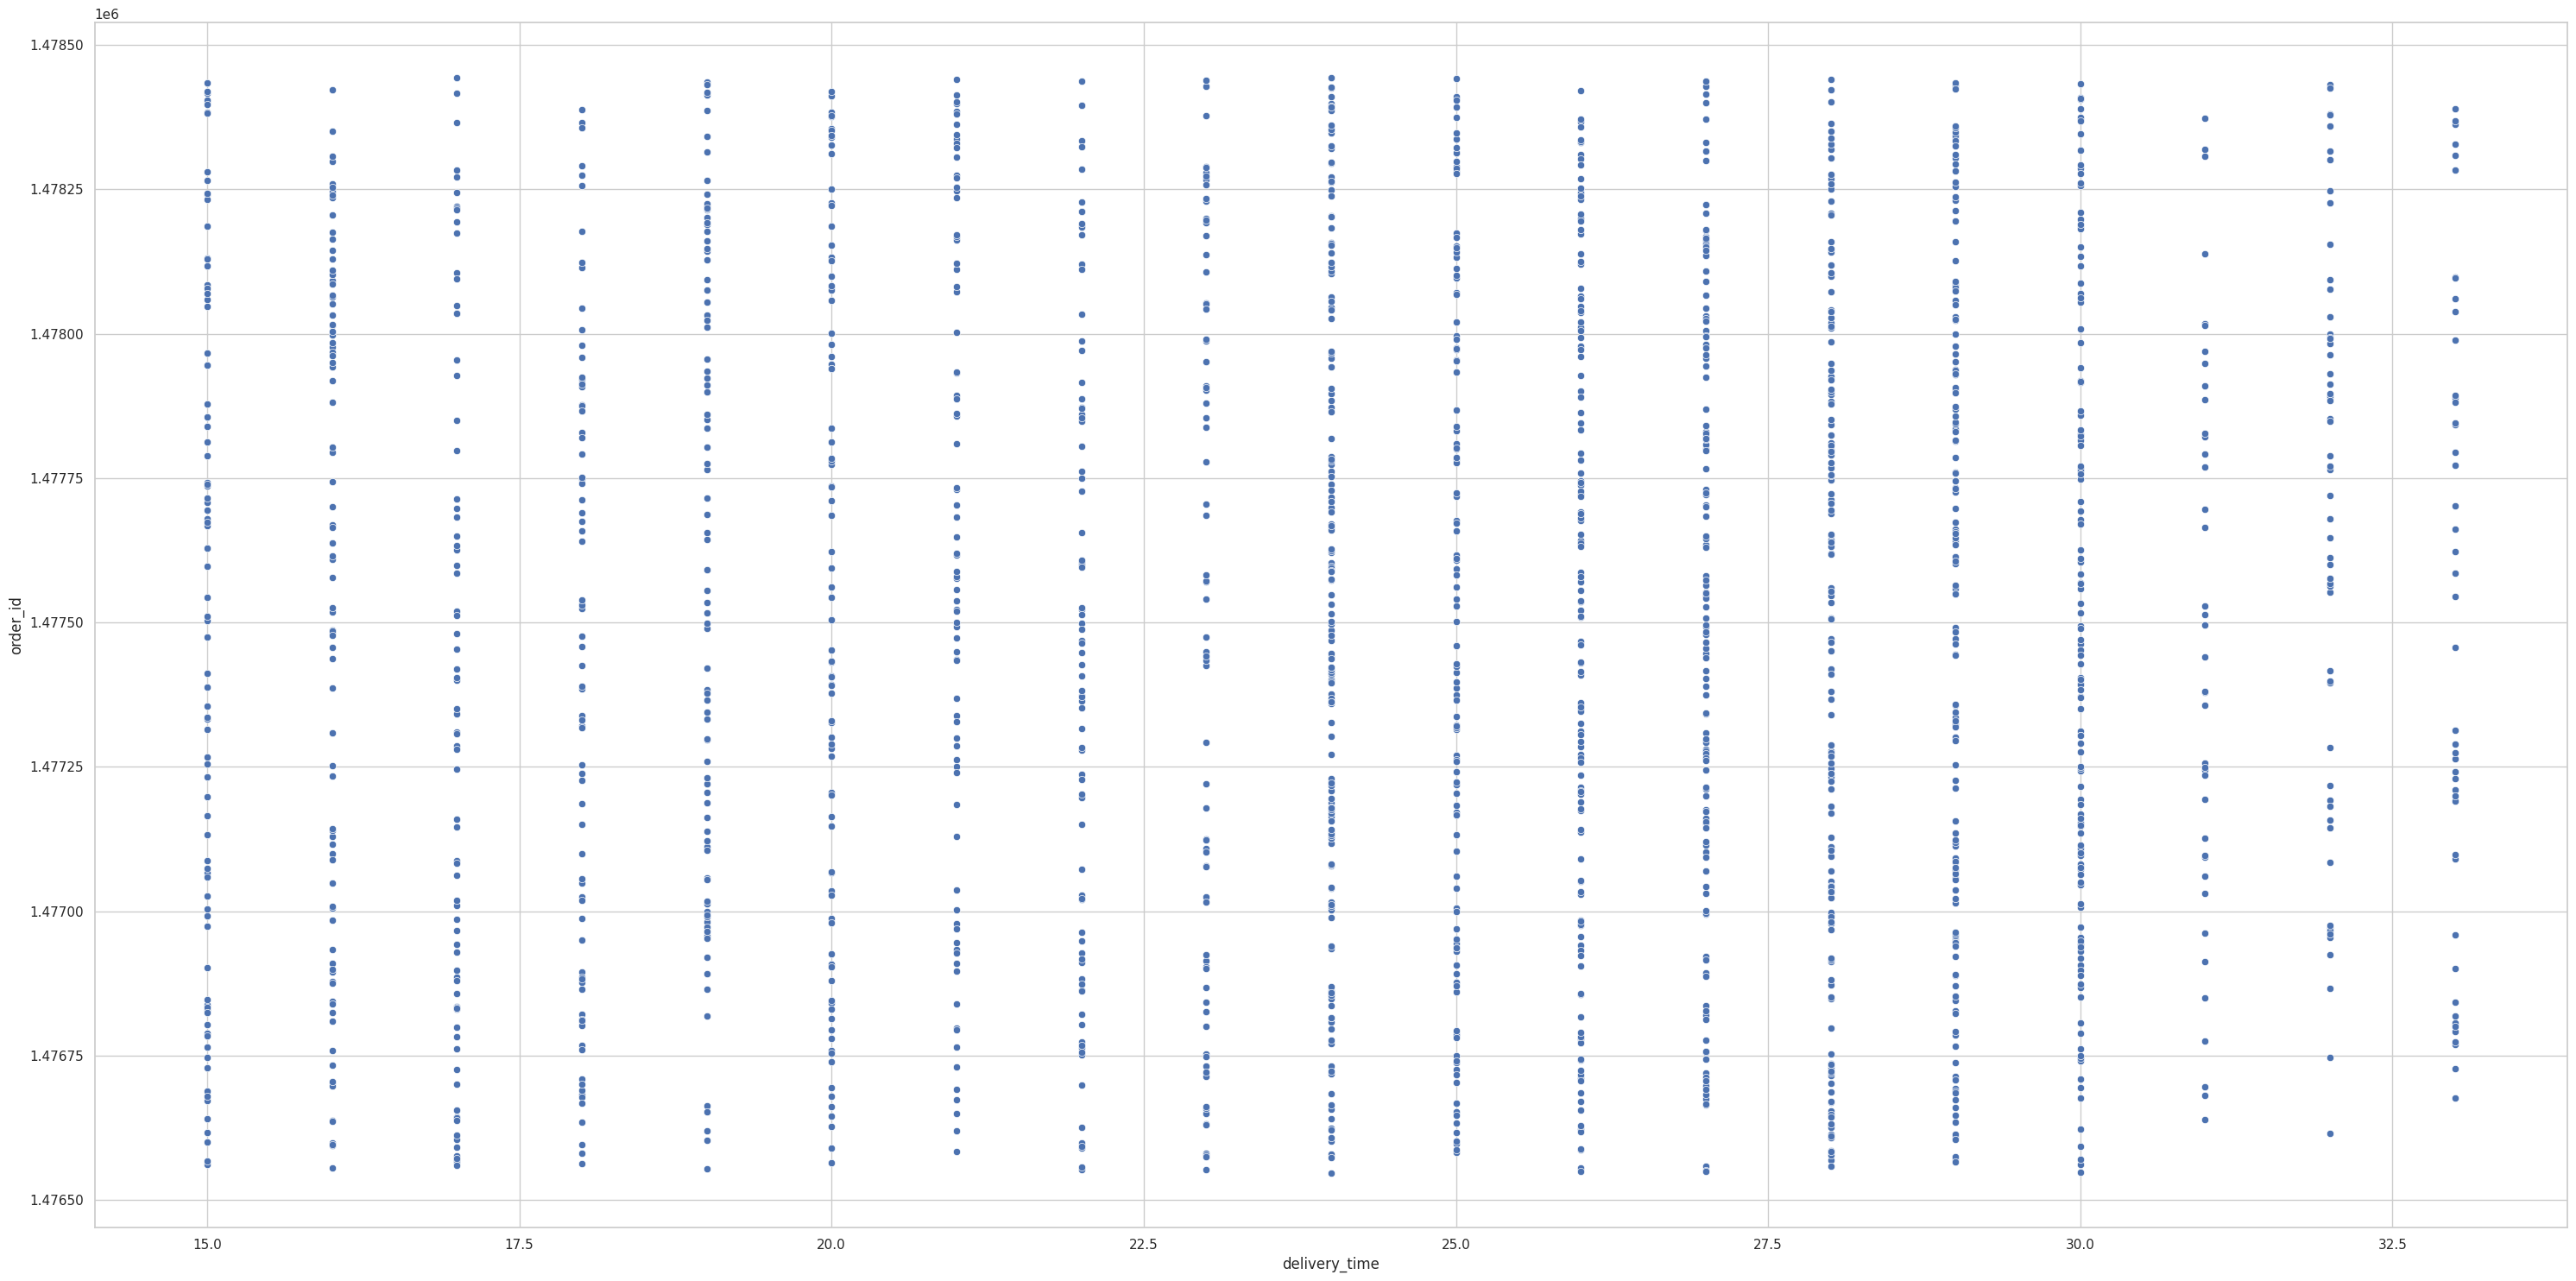

In [ ]:
# 16. Example: Scatter Plot of Delivery Time and order id.
plt.figure(figsize=(30,15))
sns.scatterplot(data=df, x='delivery_time', y='order_id')
plt.tight_layout()
plt.show();

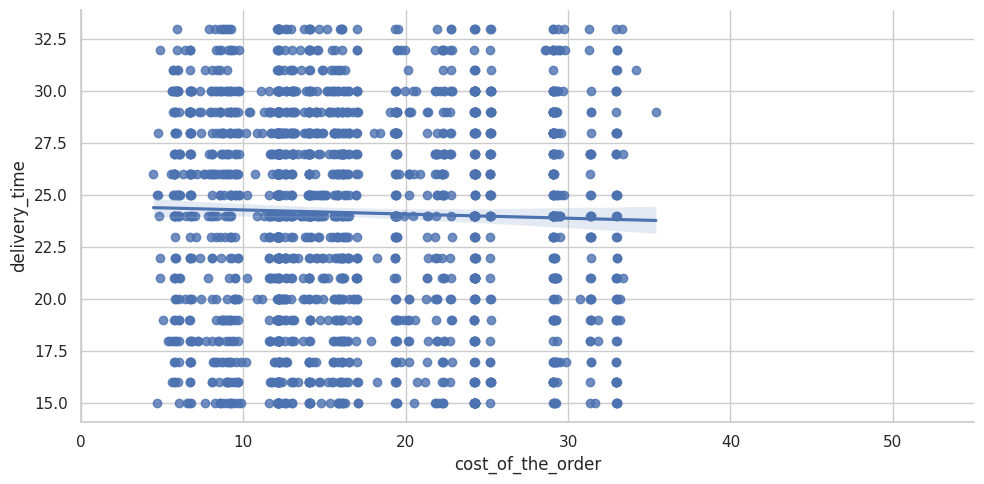

In [ ]:
# 17. Example: Limplot of Cost of the Order and Delivery Time.
sns.lmplot(data=df, x='cost_of_the_order', y='delivery_time', height=5, aspect=2)
plt.xlim(0,55)
plt.tight_layout()
plt.show();

In [ ]:
# 18 Example: Column view of Cost of the Order and Delivery Time.
df[['cost_of_the_order','delivery_time']].corr()

cost_of_the_order  delivery_time
cost_of_the_order              1.000         -0.030
delivery_time                 -0.030          1.000

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


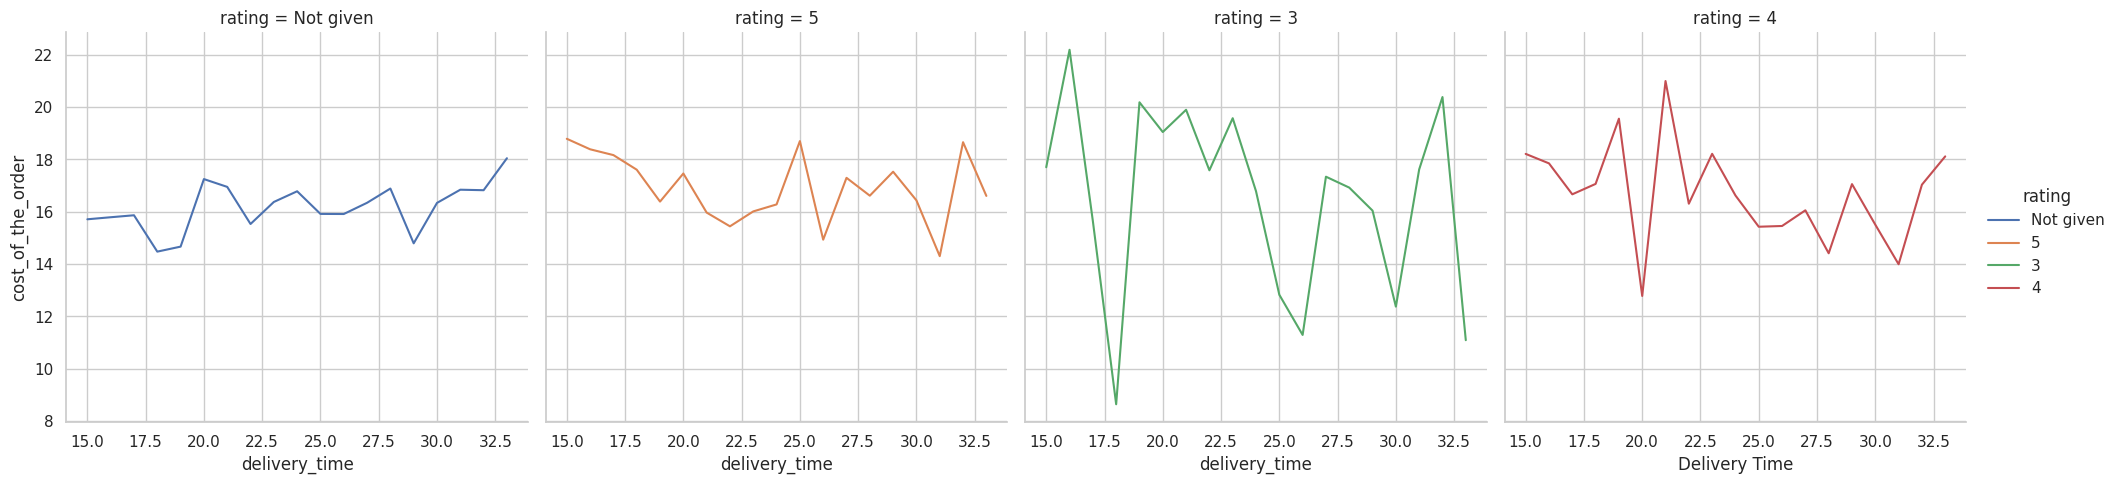

In [ ]:
# 19. Example: Replot of Delivery Time, Cost of the Order, and Rating.
sns.relplot(data=df, x='delivery_time', y='cost_of_the_order', hue='rating', kind='line', ci=None, col='rating', col_wrap=4)
plt.xlabel('Delivery Time')
plt.ylabel('Cost of the Order')
plt.show();

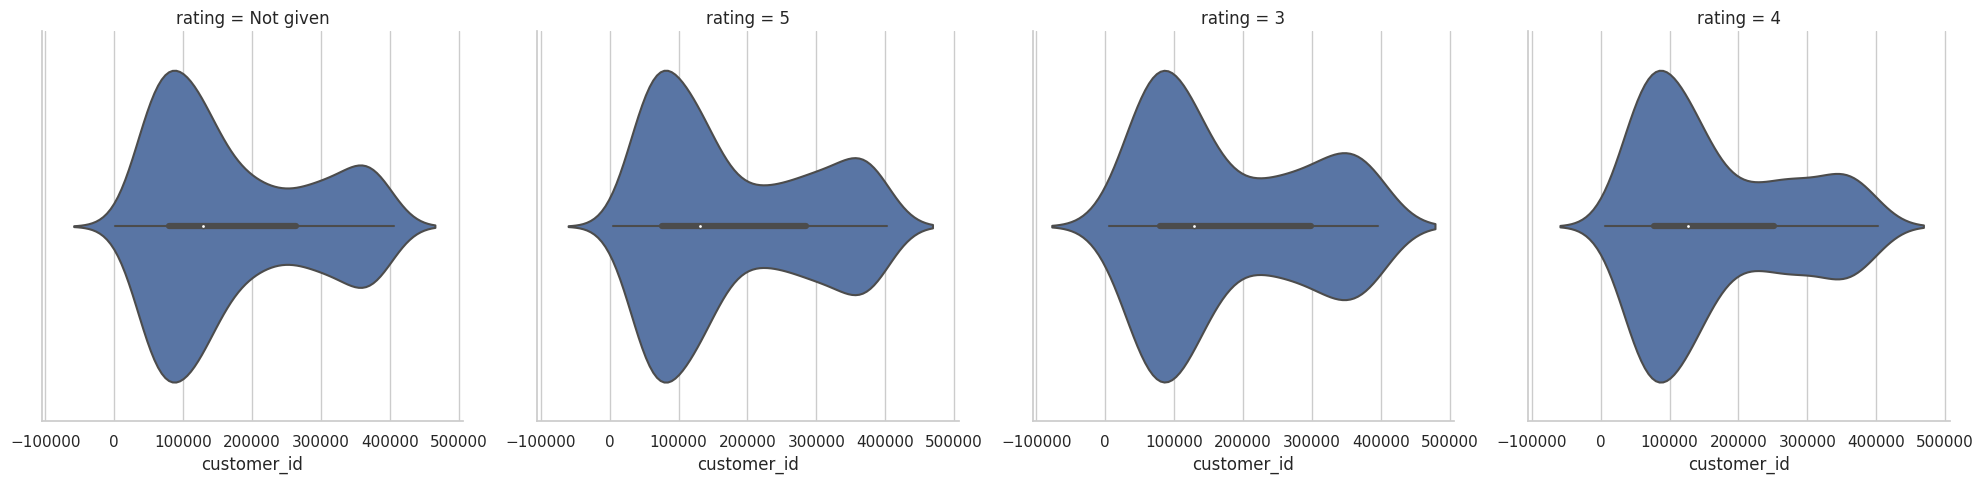

In [ ]:
# 20. Example: Catplot of Customer Id and Rating in Violin kind.
sns.catplot(x='customer_id',
            col='rating',
            data=df,
            col_wrap=4,
            kind="violin")
plt.show();

<ipython-input-54-62b62d097f5d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='delivery_time', y='cost_of_the_order', ci=None)


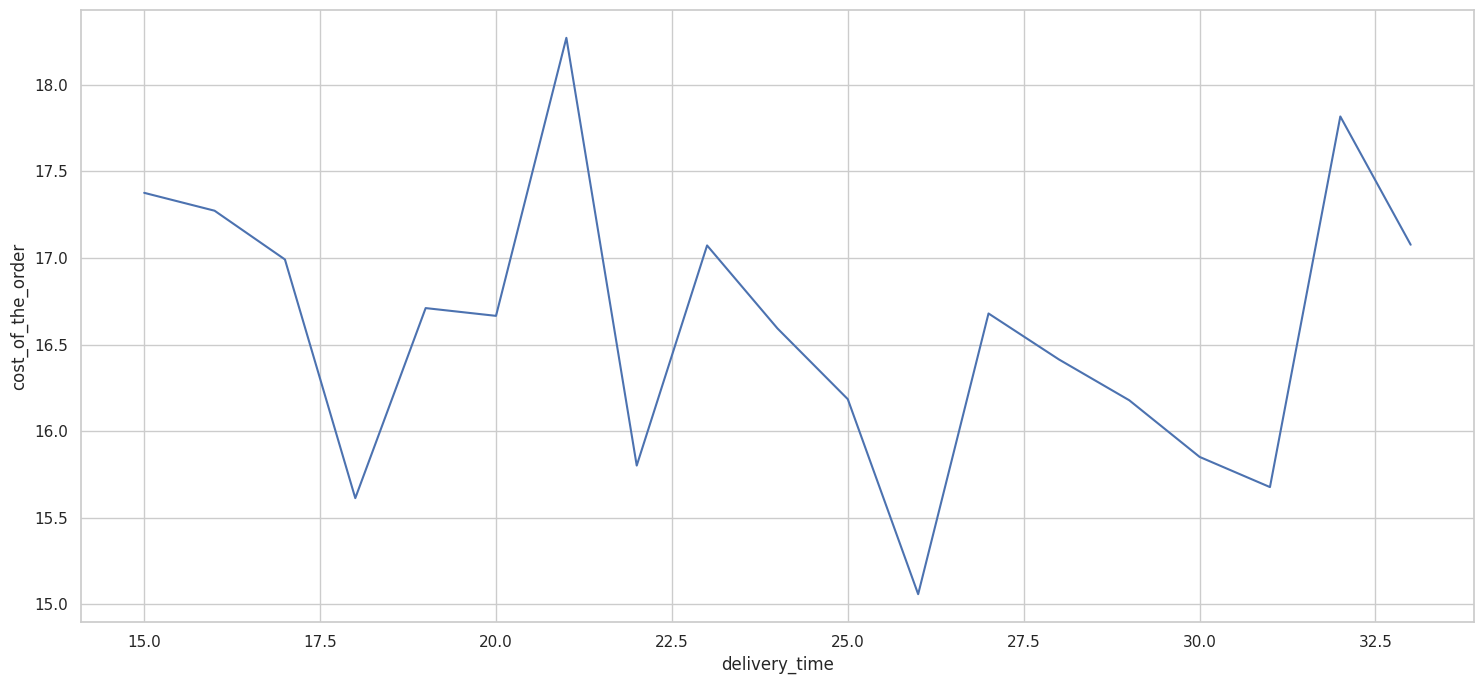

In [ ]:
# 21 Example: Lineplot of Delivery Time and Cost of the Order.
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='delivery_time', y='cost_of_the_order', ci=None)
plt.tight_layout()
plt.show();

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Question 13. The company wants to provide a promotional offer in the advertisement of the restaurants.
data = {
    'restaurant_name': ['shake Shack', 'The Meatball Shop', 'Blue Ribbon Shushi', 'Blue Ribbon Fried Chicken'],
    'rating_count': [75, 30, 60, 55],
    'average_rating': [4.5, 4.0, 4.8, 3.9]
}
df = pd.DataFrame(data)
filtered_restaurants = df[(df['rating_count'] > 50) & (df['average_rating'] > 4.0)]
print(filtered_restaurants)

      restaurant_name  rating_count  average_rating
0         shake Shack            75           4.500
2  Blue Ribbon Shushi            60           4.800


#### Observations: Shake Shack and Blue Ribbon Shushi Meet the criteria.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Question 14. The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars.
def calculate_net_revenue(orders):
    total_revenue = 0

    for order in orders:
        order_cost = order["cost"]

        if order_cost > 20:
            revenue = order_cost * 0.25
        elif order_cost > 5:
            revenue = order_cost * 0.15
        else:
            revenue = 0

        total_revenue += revenue

    return total_revenue


orders = [
    {"cost": 15},   # 15 * 0.15 = 2.25
    {"cost": 25},   # 25 * 0.25 = 6.25
    {"cost": 10},   # 10 * 0.15 = 1.5
    {"cost": 30},   # 30 * 0.25 = 7.5
]

net_revenue = calculate_net_revenue(orders)
print(f"Net Revenue: ${net_revenue:.2f}")


Net Revenue: $17.50


#### Observations: The net revenue from orders is $17.50.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Question 15. Delivery times that take more than 60 minutes.
delivery_times = [45, 50, 55, 60, 65, 70, 75, 80, 85]
count_long_deliveries = sum(1 for time in delivery_times if time > 60)
total_orders = len(delivery_times)
percentage_long_deliveries = (count_long_deliveries / total_orders) * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage_long_deliveries:.2f}%")

Percentage of orders taking more than 60 minutes: 55.56%


#### Observations: Percentage of orders taking more than 60 minutes: 55.56%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

Mean Delivery Time by Day Category:
day_category
Weekday   32.400
Weekend   42.500
Name: delivery_time, dtype: float64


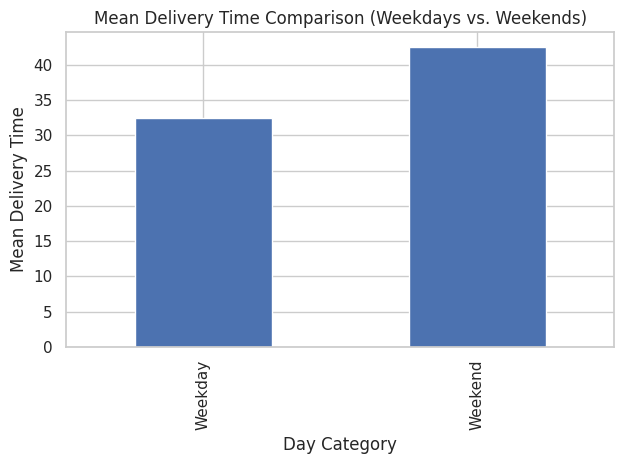

In [ ]:
# Question 16. The company wants to analyze the delivery time of the orders on weekdays and weekends.
data = {
    'day_of_the_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'delivery_time': [30, 32, 31, 35, 34, 40, 45]
}

df = pd.DataFrame(data)
df['day_category'] = df['day_of_the_week'].apply(lambda day: 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday')
delivery_time_by_day = df.groupby('day_category')['delivery_time'].mean()
print("Mean Delivery Time by Day Category:")
print(delivery_time_by_day)
delivery_time_by_day.plot(kind='bar')
plt.xlabel('Day Category')
plt.ylabel('Mean Delivery Time')
plt.title('Mean Delivery Time Comparison (Weekdays vs. Weekends)')
plt.tight_layout()
plt.show();

#### Observations: Weekday is 32.4%, Weekend is 42.5%.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions: Stong Relationship between delivery time and cost of the order. The more the cost the more time to deliver the order to the customer. Definate customer dis-satisfaction with long delivery times.
*  

### Recommendations: Just by looking at the data the system needs and overhaul of the Order Id system so that the pickup delivery person is not picking the orders they want but the order that is next to delivered to reach a new goal of 95% Customer satisfaction. Create a team to start the project. This team will be in charge in reaching out with the long delivery time orders and seek to make this up with a discount for the next 3 orders of 25% off. Inform them that the customer is their number one goal in making sure your order is on time. Would expand the Customer Support team to reach these new goals. Again, this is just a simple view of data. More would need to be conducted to get an accurate idea of why.

*  

---